In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

Fetch Data

In [62]:
#fetch data
df = pd.read_csv('data/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


EDA and Data Preparation

In [63]:
#print shape of dataset
df.shape

(303, 14)

In [64]:
#check dataypes and check for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [65]:
#check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


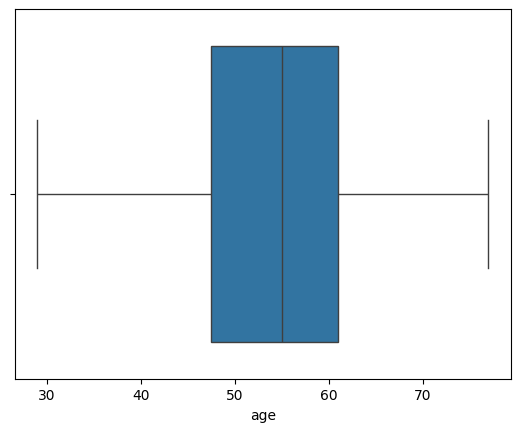

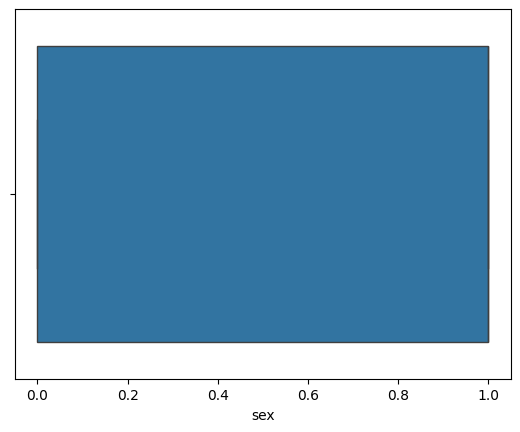

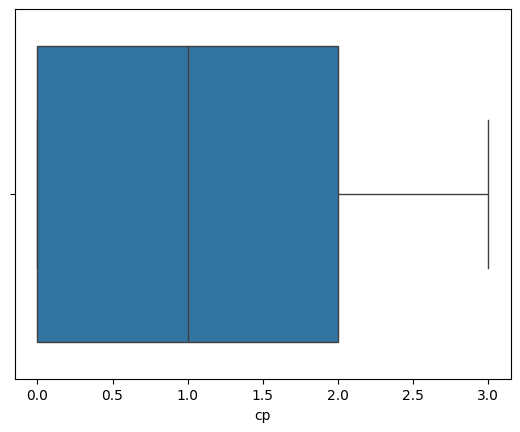

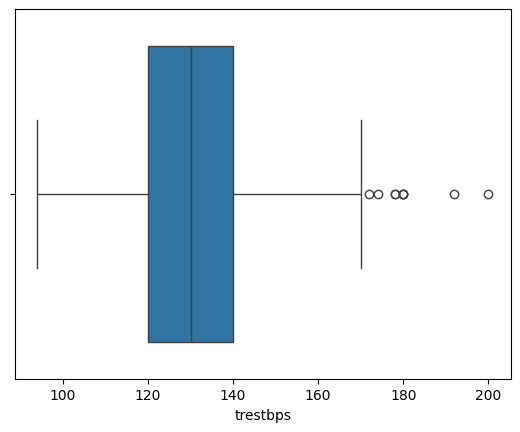

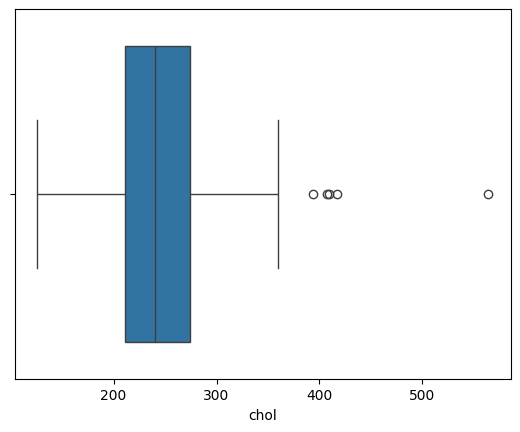

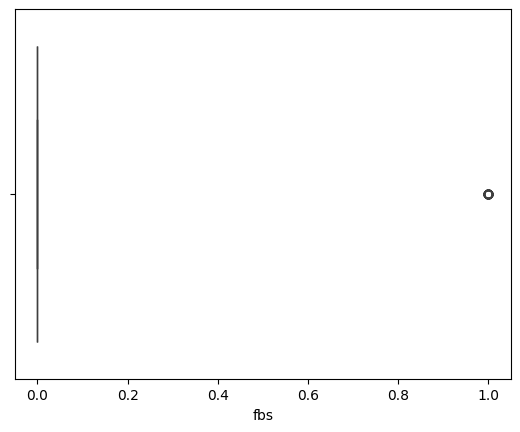

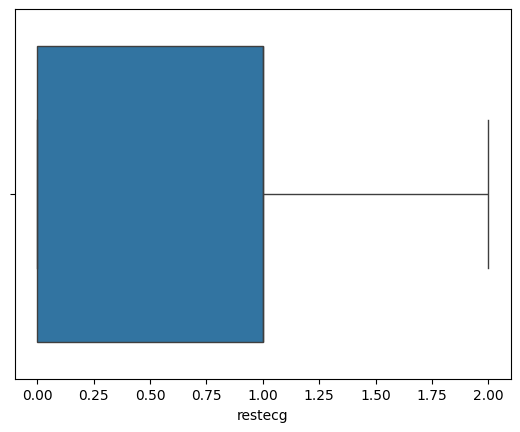

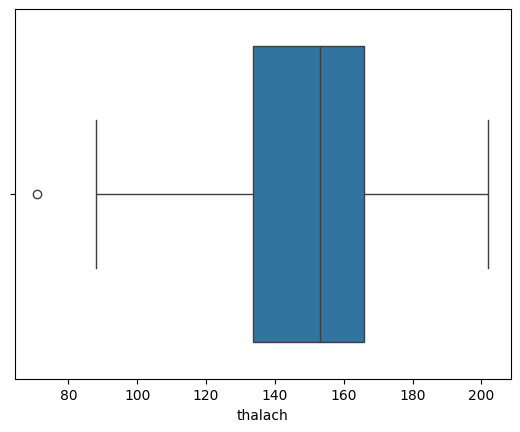

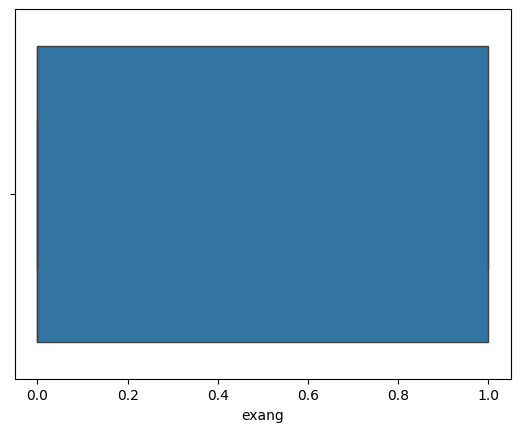

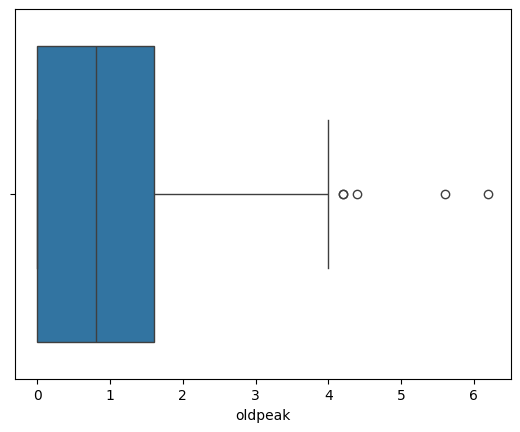

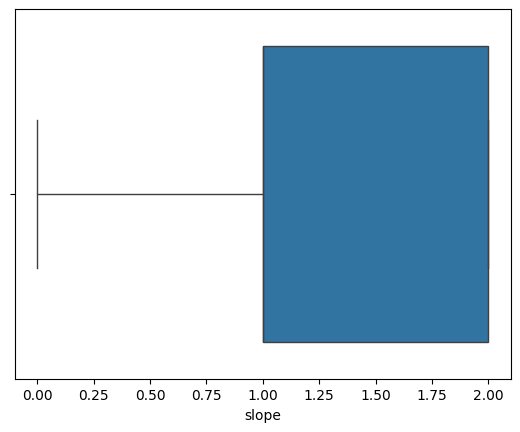

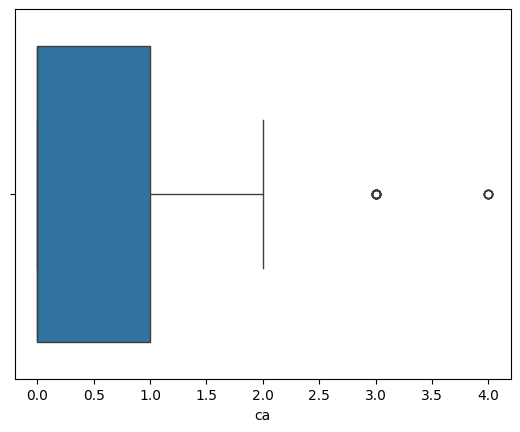

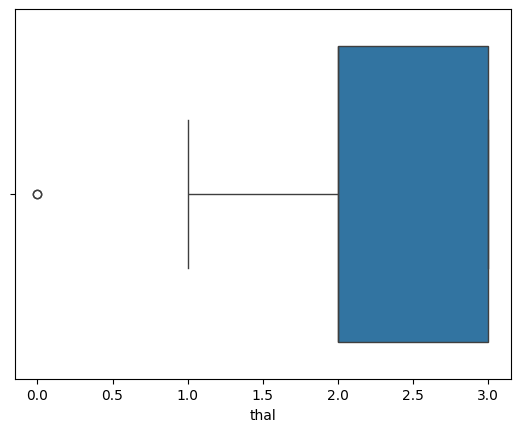

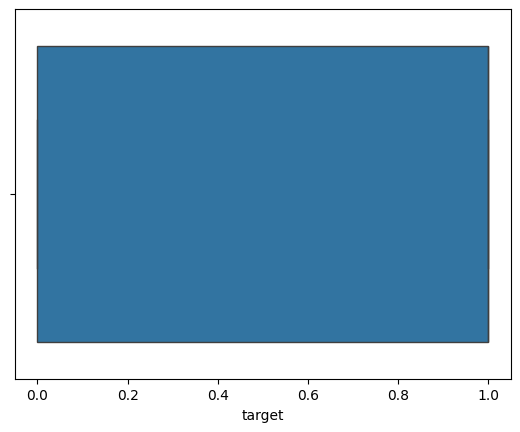

In [67]:
#check for outliers in dataset
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

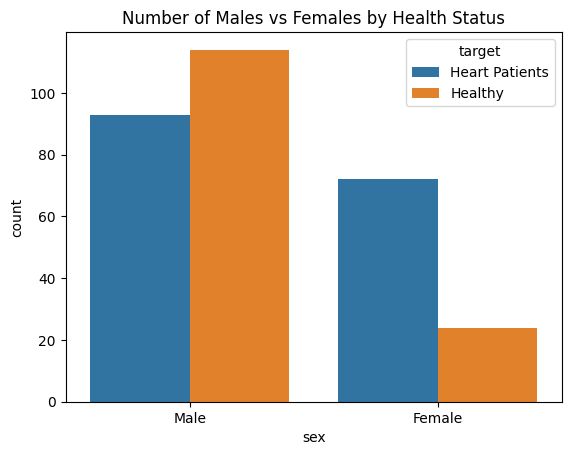

   age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    Male   3       145   233    1        0      150      0      2.3   
1   37    Male   2       130   250    0        1      187      0      3.5   
2   41  Female   1       130   204    0        0      172      0      1.4   

   slope  ca  thal          target  
0      0   0     1  Heart Patients  
1      0   0     2  Heart Patients  
2      2   0     2  Heart Patients  


In [68]:
# Create a copy of the dataframe for visualization
df_copy = df.copy()

# Map target values to descriptive labels
df_copy['target'] = df_copy['target'].map({0: 'Healthy', 1: 'Heart Patients'})

# Map sex values to descriptive labels
df_copy['sex'] = df_copy['sex'].map({0: 'Female', 1: 'Male'})

# Plot the number of males vs females, with a hue based on target
sns.countplot(x='sex', data=df_copy, hue='target')
plt.title('Number of Males vs Females by Health Status')
plt.show()

# Print the first 3 rows to check the changes
print(df_copy.head(3))


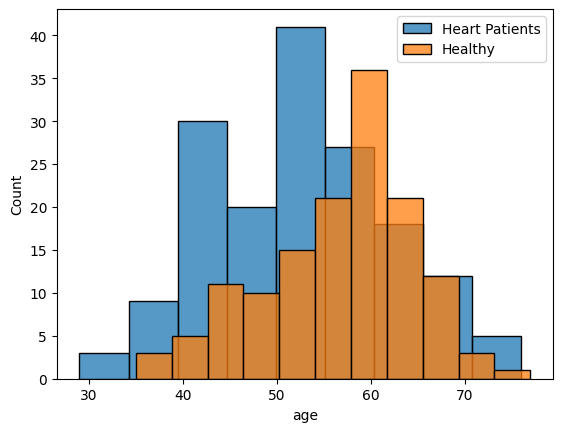

In [69]:
#Histogram to compare age with health
sns.histplot(df_copy[df_copy.target=='Heart Patients']['age'], label='Heart Patients')
sns.histplot(df_copy[df_copy.target=='Healthy']['age'], label='Healthy')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

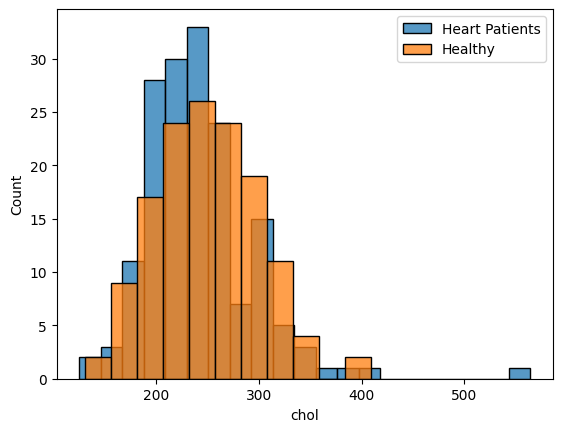

In [70]:
#Histogram to compare cholesterol with health
sns.histplot(df_copy[df_copy.target=='Heart Patients']['chol'], label="Heart Patients")
sns.histplot(df_copy[df_copy.target=='Healthy']['chol'], label="Healthy")
plt.legend()
plt.show

Define Keras Model

In [71]:
# Split dataset into input and output
X = df.drop(['target'], axis=1)
y = df.target
print(X.head(3))
print(X.shape)
print('______________')
print(y.head(3))
print(y.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
(303, 13)
______________
0    1
1    1
2    1
Name: target, dtype: int64
(303,)


In [72]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

#print shape of training data
print(X_train.shape)
print(X_train.shape[1])

(212, 13)
13


In [73]:
# use linear activation for inner layer and sigmoid for output layer 
model = keras.Sequential()
model.add(layers.Dense(11, activation ='relu', input_shape=(X_train.shape[1], ))) #input layer. we could use 13 neurons, but 11 performs better
model.add(layers.Dense(1, activation ='sigmoid'))

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Fit Keras Model

In [74]:
# Compile and fit kers model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.22, epochs = 300)
model.summary()

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5308 - loss: 4.5815 - val_accuracy: 0.5319 - val_loss: 3.6687
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4559 - loss: 4.2948 - val_accuracy: 0.5106 - val_loss: 3.4482
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5311 - loss: 3.6800 - val_accuracy: 0.5319 - val_loss: 3.0039
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5970 - loss: 2.7959 - val_accuracy: 0.5532 - val_loss: 2.5575
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5537 - loss: 3.0433 - val_accuracy: 0.5319 - val_loss: 2.1533
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5551 - loss: 2.7360 - val_accuracy: 0.5745 - val_loss: 1.8220
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6107 - loss: 2.1991 - val_accuracy: 0.5957 - val_loss: 1.8801
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6407 - loss: 1.8908 - val_accuracy: 0.5745 - val_loss: 1.5763

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           154 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500 (1.96 KB)

 Trainable params: 166 (664.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 334 (1.31 KB)

Visualize the Training

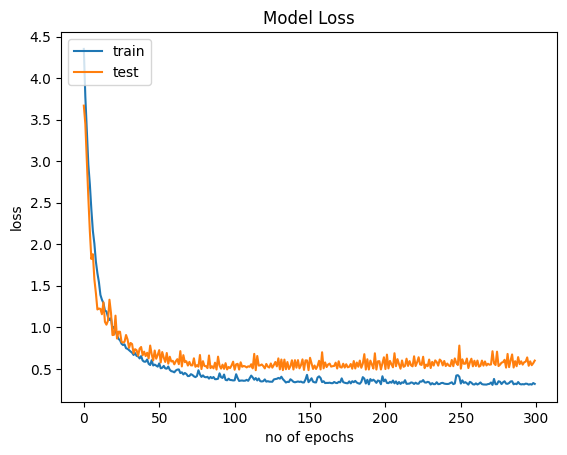

In [75]:
#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

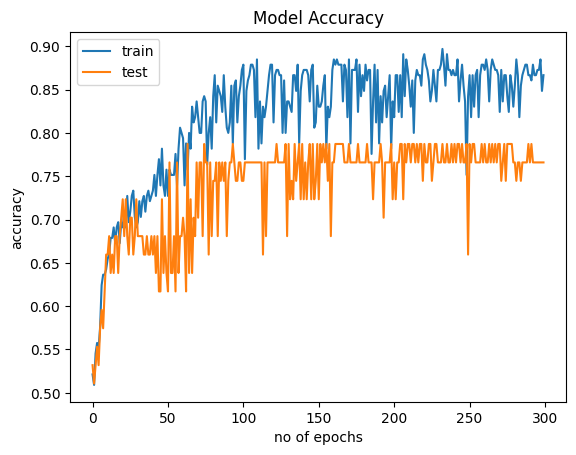

In [76]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate Model

In [77]:
# Evaluate Model
# #Predict on test data
y_pred = model.predict(X_test).flatten()

# Convert probabilities to binary class predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_binary, target_names=['Healthy', 'Heart Patients'])
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Confusion Matrix:
 [[23 13]
 [ 4 51]]
Classification Report:
                 precision    recall  f1-score   support

       Healthy       0.85      0.64      0.73        36
Heart Patients       0.80      0.93      0.86        55

      accuracy                           0.81        91
     macro avg       0.82      0.78      0.79        91
  weighted avg       0.82      0.81      0.81        91



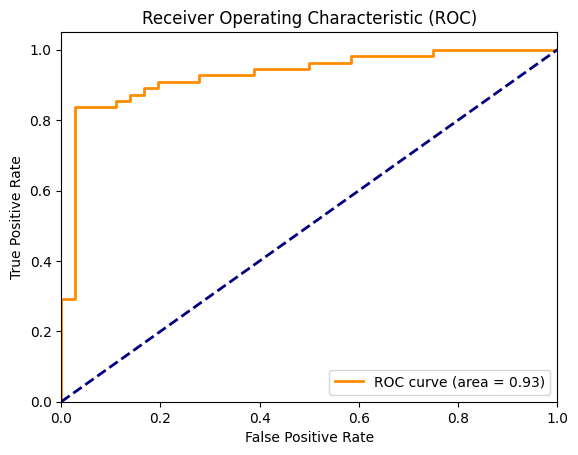

In [78]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Make Predictions

In [79]:
# Input features for prediction

# Toggle between the following two lines to test different cases
Xnew = np.array([[78, 1, 0, 68, 280, 1, 1, 195, 0, 0.2, 1, 2, 3]], dtype=np.float64)  # Example input for an unhealthy person
# Xnew = np.array([[18, 1, 0, 130, 253, 0, 1, 144, 1, 1.4, 2, 1, 3]], dtype=np.float64)  # Example input for a healthy person

print("Number of features:", len(Xnew[0]))  # Should match the number of input features used in training

# Making the prediction
ynew = model.predict(Xnew)

# Display the predicted probability
print(f'Predicted Probability: {ynew[0][0]:.4f}')

# Determine if the person is predicted to be a heart patient
prediction = (ynew > 0.5).astype(int)
print(f'Is person a heart patient? {"Yes" if prediction[0][0] == 1 else "No"}')

Number of features: 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Probability: 0.6557
Is person a heart patient? Yes
